In [1]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures


house_df = pd.read_csv('kc_house_data.csv')

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [3]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]
print(type(X))
print(type(y))
model = LinearRegression()

#Your code:
model.fit(X,y)

#Hint: .fit()

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


LinearRegression()

0.49670880166311393


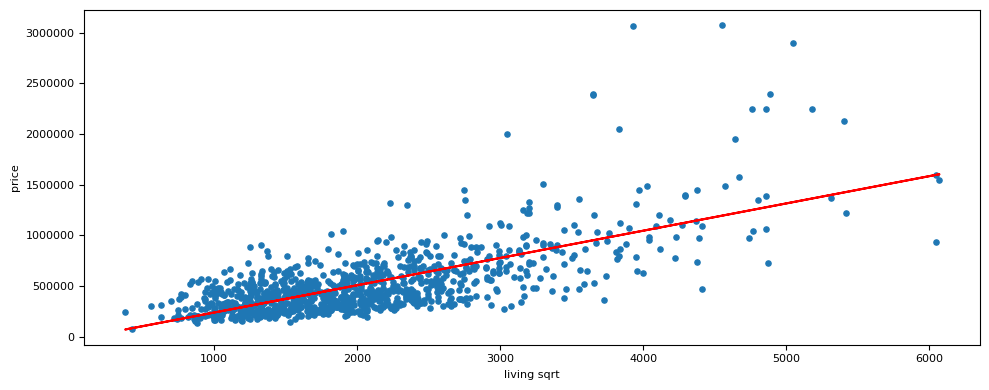

In [4]:
#b)

#Your code:
y_pred = model.predict(X)

plt.figure(figsize=(10,4))
plt.xlabel("living sqrt", fontsize=8)
plt.ylabel("price",fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ticklabel_format(style='plain', axis='y')
plt.scatter(X,y,s=14)
plt.plot(X,y_pred, color="red")
plt.tight_layout()

print(model.score(X,y))

plt.show()
#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

`poly` is used for defines a polynomial feature transformer for the specified degree(order)

`poly.fit_transorm(X)` Transform features vector $\ [[x_1,x_2]] => [[x_1, x_2, x_1^2, x_1 x_2, x_2^2]]$ when degree = 2

Example : $\ [[1, 2], [3, 4]] => [[1, 2, 1, 2, 4], [3,4,9,12,16]]$

Example : $\ [[1] [2] [3]] => [[1,1] [2,4] [3,9]]$  our `X` have this form



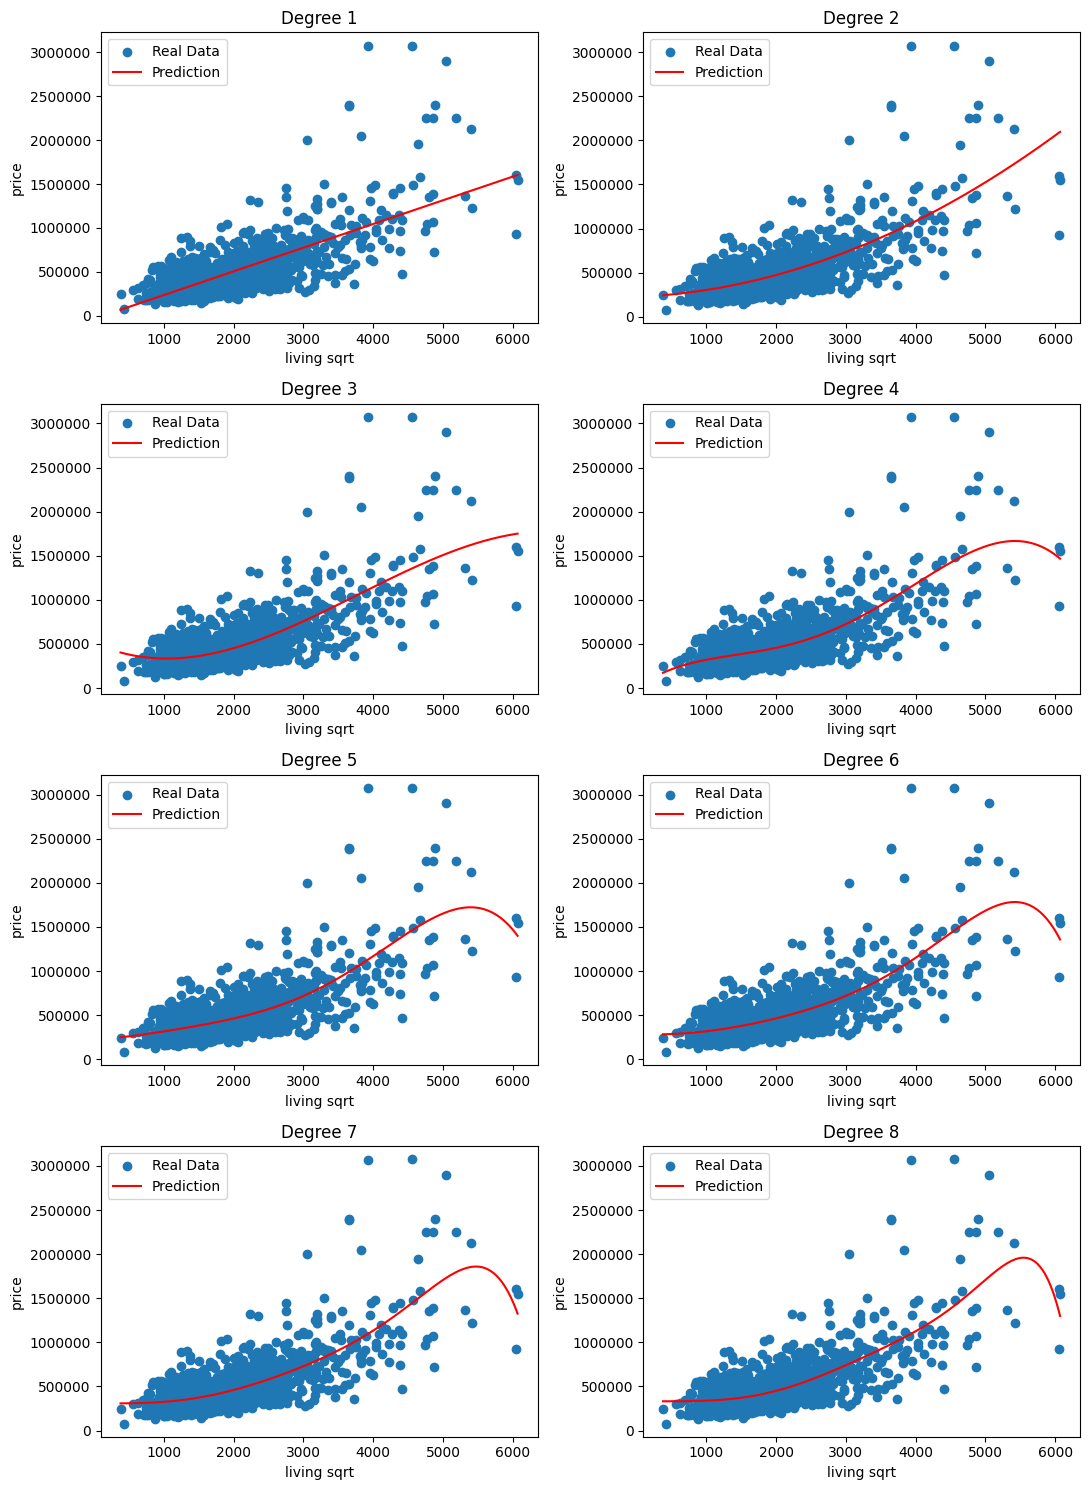

In [5]:
#c)

X_new = np.arange(X.min(),X.max(),1).reshape(-1,1)
fig, axs = plt.subplots(4, 2, figsize=(11, 15))
errors =[]
for order in range(1,9):

    #defines a polynomial feature transformer for the specified degree(order)
    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)
    model.fit(X_order,y)


    #prediction y values based on (min,max) range of X (we need it to plot)
    X_new_order = poly.fit_transform(X_new)
    y_prediction = model.predict(X_new_order)

    axs[(order - 1) // 2, (order - 1) % 2].ticklabel_format(style='plain', axis='y')
    axs[(order - 1) // 2, (order - 1) % 2].scatter(X, y, label='Real Data')
    axs[(order - 1) // 2, (order - 1) % 2].plot(X_new, y_prediction, color="red", label='Prediction')
    axs[(order - 1) // 2, (order - 1) % 2].set_title(f"Degree {order}")
    axs[(order - 1) // 2, (order - 1) % 2].set_xlabel("living sqrt")
    axs[(order - 1) // 2, (order - 1) % 2].set_ylabel("price")
    axs[(order - 1) // 2, (order - 1) % 2].legend()


    errors.append(mean_squared_error(y, model.predict(X_order)))

plt.tight_layout()
plt.show()

    #Your code:


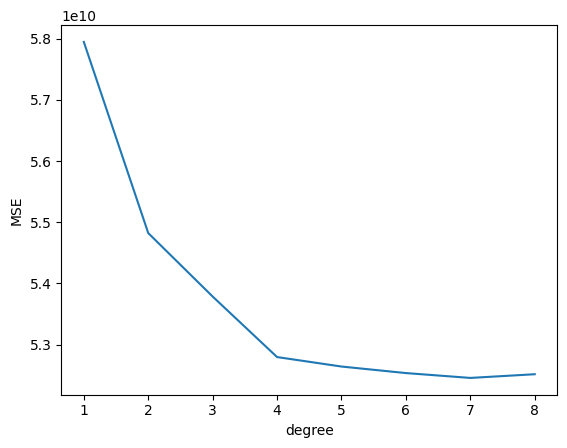

In [13]:
#Your code:
plt.xlabel("degree")
plt.ylabel("MSE")
plt.plot(list(range(1,9)),errors)


## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models.

### Function `train_test_split`

The `train_test_split` function randomly splits input data (features `X` and targets `y`) into a training set and a test set.

#### Function Arguments:

- **X**: Array or DataFrame containing features (input data) for the model.
- **y**: Array or series containing labels (targets) corresponding to the features in `X`.
- **test_size=0.3**: Specifies the size of the test set. Here, 30% of the data will go to the test set, and the remaining 70% to the training set.
- **random_state=44**: Sets a random seed for the random number generator, ensuring the split is reproducible. Setting this to a specific number results in the same data split every time the code is run.


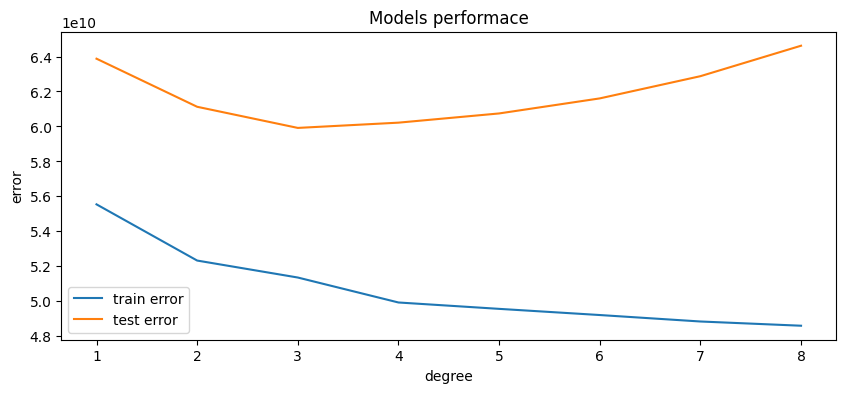

In [34]:
#a)

errors_train = []
errors_test = []

plt.figure(figsize=(10,4))

for order in range(1,9):

    poly = PolynomialFeatures(order, include_bias = False)
    X_order = poly.fit_transform(X)

    X_train, X_test, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    model.fit(X_train,y_train)

    errors_train.append(mean_squared_error(y_train, model.predict(X_train)))
    errors_test.append(mean_squared_error(y_test, model.predict(X_test)))

plt.xlabel('degree')
plt.ylabel('error')
plt.title('Models performace')
plt.plot(list(range(1,9)),errors_train,label="train error")
plt.plot(list(range(1,9)),errors_test,label="test error")
plt.legend()
plt.show()


## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

396407.1889615157


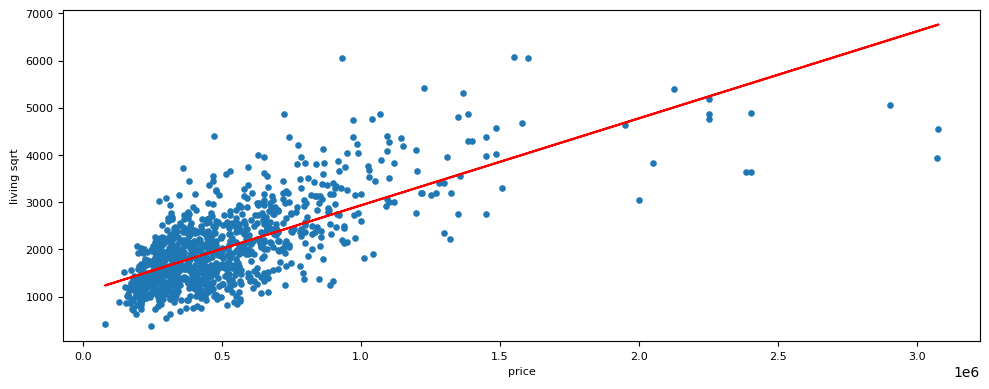

In [9]:
#a)

X = house_df.price.values.reshape(-1,1)[:1000]
y = house_df.sqft_living.values.reshape(-1)[:1000]

model = LinearRegression()
model.fit(X,y)

y_pred = model.predict(X)

plt.figure(figsize=(10,4))
plt.xlabel("price", fontsize=8)
plt.ylabel("living sqrt",fontsize=8)
plt.xticks(fontsize=8)
plt.yticks(fontsize=8)
plt.ticklabel_format(style='plain', axis='y')
plt.scatter(X,y,s=14)
plt.plot(X,y_pred, color="red")
plt.tight_layout()

print(mean_squared_error(y, y_pred))

plt.show()



#Your code:


In [19]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0} $^2".format(mean_squared_error(y_pred, y_test)))
print("Root mean squared error equals: {0} $".format(np.sqrt(mean_squared_error(y_pred, y_test))))

#Your model:


Mean squared error equals: 48749250331.21729 $^2
Root mean squared error equals: 220792.32398617777 $


In [28]:
X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values.reshape(-1,4)
y = house_df.price.values.reshape(-1)

poly = PolynomialFeatures(3, include_bias = False)
X = poly.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.01, random_state=10)

model = LinearRegression()
_= model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Mean squared error equals: {0} $^2".format(mean_squared_error(y_pred, y_test)))
print("Root mean squared error equals: {0} $".format(np.sqrt(mean_squared_error(y_pred, y_test))))

#My model (decrease test_size and change random_state)

Mean squared error equals: 37857542908.173096 $^2
Root mean squared error equals: 194570.1490675615 $
